# Proposed System

In [2]:
# Intel Optimization Parameters

!export TF_ENABLE_ONEDNN_OPTS=1
!export TF_ENABLE_MKL_NATIVE_FORMAT=1

!export KMP_BLOCKTIME=0
!export KMP_AFFINITY="granularity=fine,compact,1,0"
!export KMP_SETTINGS=1

!export OMP_NUM_THREADS=12

!pip install scikit-learn-intelex

from sklearnex import patch_sklearn
patch_sklearn()

import tensorflow
tensorflow.config.threading.set_intra_op_parallelism_threads(12)
tensorflow.config.threading.set_inter_op_parallelism_threads(2)
tensorflow.config.set_soft_device_placement(True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 MB 7.8 MB/s eta 0:00:00


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [9]:
# Importing libraries for model traning and metrices
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers

In [5]:
# Defining the CNN model with MFCC, MEL Scale, and Chroma

# Model definitions
model = Sequential()

# Input layer
model.add(Conv1D(256, 8, padding='same',input_shape=(75,1)))
model.add(Activation('relu'))

model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.6))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.6))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))

model.add(Dense(4096, activation='relu'))

model.add(Dropout(0.6))

# Output layer
model.add(Dense(16))
model.add(Activation('softmax'))


# Model optimisers and learning rates
optimizer = tensorflow.keras.optimizers.SGD(learning_rate = 0.001, momentum=0.9, decay=0.0)

# Model training initialisation
cnn = Process_Train_Stat("./train_features.csv", "./test_features.csv")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 75, 256)        │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 75, 256)        │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 75, 128)        │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 75, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 75, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 75, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 75, 64)         │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 75, 64)         │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    19,664,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             

 Total params: 37,794,448 (144.17 MB)

 Trainable params: 37,793,680 (144.17 MB)

 Non-trainable params: 768 (3.00 KB)

None
(4201, 75)
['female_angry' 'female_calm' 'female_disgust' 'female_fearful'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprised'
 'male_angry' 'male_calm' 'male_disgust' 'male_fearful' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprised']
(4201, 75, 1)
(1051, 75, 1)
Epoch 1/30


 21/263 ━━━━━━━━━━━━━━━━━━━━ 3:05 767ms/step - accuracy: 0.0491 - loss: 2.9796

 22/263 ━━━━━━━━━━━━━━━━━━━━ 3:16 814ms/step - accuracy: 0.0499 - loss: 2.9756

 27/263 ━━━━━━━━━━━━━━━━━━━━ 3:44 951ms/step - accuracy: 0.0535 - loss: 2.9601

 28/263 ━━━━━━━━━━━━━━━━━━━━ 3:49 976ms/step - accuracy: 0.0541 - loss: 2.9580

 30/263 ━━━━━━━━━━━━━━━━━━━━ 3:55 1s/step - accuracy: 0.0554 - loss: 2.9542

 31/263 ━━━━━━━━━━━━━━━━━━━━ 4:22 1s/step - accuracy: 0.0560 - loss: 2.9524

 32/263 ━━━━━━━━━━━━━━━━━━━━ 4:24 1s/step - accuracy: 0.0567 - loss: 2.9505

 33/263 ━━━━━━━━━━━━━━━━━━━━ 4:29 1s/step - accuracy: 0.0573 - loss: 2.9485

 35/263 ━━━━━━━━━━━━━━━━━━━━ 4:26 1s/step - accuracy: 0.0587 - loss: 2.9449

 37/263 ━━━━━━━━━━━━━━━━━━━━ 4:42 1s/step - accuracy: 0.0600 - loss: 2.9413

 38/263 ━━━━━━━━━━━━━━━━━━━━ 4:41 1s/step - accuracy: 0.0607 - loss: 2.9396

 39/263 ━━━━━━━━━━━━━━━━━━━━ 4:41 1s/step - accuracy: 0.0613 - loss: 2.9377

 48/263 ━━━━━━━━━━━━━━━━━━━━ 4:31 1s/step - accuracy: 0.0658 - loss: 2.9235

 52/263 ━━━━━━━━━━━━━━━━━━━━ 4:19 1s/step - accuracy: 0.0676 - loss: 2.9171

 53/263 ━━━━━━━━━━━━━━━━━━━━ 4:29 1s/step - accuracy: 0.0680 - loss: 2.9155

 54/263 ━━━━━━━━━━━━━━━━━━━━ 4:29 1s/step - accuracy: 0.0684 - loss: 2.9139

 55/263 ━━━━━━━━━━━━━━━━━━━━ 4:30 1s/step - accuracy: 0.0689 - loss: 2.9124

 58/263 ━━━━━━━━━━━━━━━━━━━━ 4:22 1s/step - accuracy: 0.0701 - loss: 2.9080

 60/263 ━━━━━━━━━━━━━━━━━━━━ 4:29 1s/step - accuracy: 0.0708 - loss: 2.9052

 92/263 ━━━━━━━━━━━━━━━━━━━━ 3:12 1s/step - accuracy: 0.0770 - loss: 2.8707

 97/263 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 0.0779 - loss: 2.8663

 98/263 ━━━━━━━━━━━━━━━━━━━━ 3:05 1s/step - accuracy: 0.0781 - loss: 2.8655

 99/263 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.0783 - loss: 2.8646

102/263 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.0788 - loss: 2.8622

105/263 ━━━━━━━━━━━━━━━━━━━━ 3:04 1s/step - accuracy: 0.0794 - loss: 2.8597

106/263 ━━━━━━━━━━━━━━━━━━━━ 3:04 1s/step - accuracy: 0.0796 - loss: 2.8589

110/263 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.0803 - loss: 2.8556

111/263 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.0805 - loss: 2.8548

112/263 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.0807 - loss: 2.8540

114/263 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.0811 - loss: 2.8524

116/263 ━━━━━━━━━━━━━━━━━━━━ 2:54 1s/step - accuracy: 0.0815 - loss: 2.8508

117/263 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.0817 - loss: 2.8500

120/263 ━━━━━━━━━━━━━━━━━━━━ 2:52 1s/step - accuracy: 0.0823 - loss: 2.8476

121/263 ━━━━━━━━━━━━━━━━━━━━ 2:54 1s/step - accuracy: 0.0825 - loss: 2.8468

123/263 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.0829 - loss: 2.8453

125/263 ━━━━━━━━━━━━━━━━━━━━ 2:49 1s/step - accuracy: 0.0833 - loss: 2.8438

126/263 ━━━━━━━━━━━━━━━━━━━━ 2:48 1s/step - accuracy: 0.0835 - loss: 2.8430

127/263 ━━━━━━━━━━━━━━━━━━━━ 2:47 1s/step - accuracy: 0.0837 - loss: 2.8422

128/263 ━━━━━━━━━━━━━━━━━━━━ 2:46 1s/step - accuracy: 0.0839 - loss: 2.8415

129/263 ━━━━━━━━━━━━━━━━━━━━ 2:45 1s/step - accuracy: 0.0842 - loss: 2.8407

130/263 ━━━━━━━━━━━━━━━━━━━━ 2:48 1s/step - accuracy: 0.0844 - loss: 2.8400

131/263 ━━━━━━━━━━━━━━━━━━━━ 2:47 1s/step - accuracy: 0.0846 - loss: 2.8393

135/263 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.0854 - loss: 2.8364

136/263 ━━━━━━━━━━━━━━━━━━━━ 2:40 1s/step - accuracy: 0.0856 - loss: 2.8357

137/263 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.0858 - loss: 2.8350

138/263 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.0860 - loss: 2.8342

140/263 ━━━━━━━━━━━━━━━━━━━━ 2:38 1s/step - accuracy: 0.0864 - loss: 2.8328

141/263 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.0866 - loss: 2.8321

143/263 ━━━━━━━━━━━━━━━━━━━━ 2:37 1s/step - accuracy: 0.0870 - loss: 2.8306

144/263 ━━━━━━━━━━━━━━━━━━━━ 2:36 1s/step - accuracy: 0.0872 - loss: 2.8299

146/263 ━━━━━━━━━━━━━━━━━━━━ 2:37 1s/step - accuracy: 0.0876 - loss: 2.8285

149/263 ━━━━━━━━━━━━━━━━━━━━ 2:32 1s/step - accuracy: 0.0882 - loss: 2.8264

153/263 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.0889 - loss: 2.8236

158/263 ━━━━━━━━━━━━━━━━━━━━ 2:19 1s/step - accuracy: 0.0898 - loss: 2.8203

160/263 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.0901 - loss: 2.8189

162/263 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.0905 - loss: 2.8176

163/263 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.0906 - loss: 2.8169

165/263 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.0910 - loss: 2.8157

166/263 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.0911 - loss: 2.8150

167/263 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.0913 - loss: 2.8144

168/263 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.0915 - loss: 2.8137

169/263 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.0917 - loss: 2.8131

170/263 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.0919 - loss: 2.8124

171/263 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.0920 - loss: 2.8118

174/263 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.0926 - loss: 2.8098

175/263 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.0928 - loss: 2.8092

176/263 ━━━━━━━━━━━━━━━━━━━━ 2:05 1s/step - accuracy: 0.0929 - loss: 2.8085

177/263 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - accuracy: 0.0931 - loss: 2.8079

180/263 ━━━━━━━━━━━━━━━━━━━━ 1:59 1s/step - accuracy: 0.0937 - loss: 2.8059

185/263 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.0946 - loss: 2.8028

186/263 ━━━━━━━━━━━━━━━━━━━━ 1:50 1s/step - accuracy: 0.0948 - loss: 2.8021

187/263 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 0.0949 - loss: 2.8015

188/263 ━━━━━━━━━━━━━━━━━━━━ 1:48 1s/step - accuracy: 0.0951 - loss: 2.8008

189/263 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.0953 - loss: 2.8002

190/263 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.0955 - loss: 2.7996

193/263 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.0961 - loss: 2.7977

196/263 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.0966 - loss: 2.7959

197/263 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.0968 - loss: 2.7952

198/263 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.0970 - loss: 2.7946

199/263 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.0971 - loss: 2.7940

200/263 ━━━━━━━━━━━━━━━━━━━━ 1:32 1s/step - accuracy: 0.0973 - loss: 2.7934

201/263 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.0975 - loss: 2.7928

202/263 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.0977 - loss: 2.7922

203/263 ━━━━━━━━━━━━━━━━━━━━ 1:30 2s/step - accuracy: 0.0979 - loss: 2.7916

205/263 ━━━━━━━━━━━━━━━━━━━━ 1:27 2s/step - accuracy: 0.0983 - loss: 2.7904

206/263 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - accuracy: 0.0985 - loss: 2.7898

207/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 2s/step - accuracy: 0.0987 - loss: 2.7891

209/263 ━━━━━━━━━━━━━━━━━━━━ 1:22 2s/step - accuracy: 0.0990 - loss: 2.7879

210/263 ━━━━━━━━━━━━━━━━━━━━ 1:21 2s/step - accuracy: 0.0992 - loss: 2.7873

211/263 ━━━━━━━━━━━━━━━━━━━━ 1:26 2s/step - accuracy: 0.0994 - loss: 2.7867

212/263 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - accuracy: 0.0996 - loss: 2.7861

214/263 ━━━━━━━━━━━━━━━━━━━━ 1:22 2s/step - accuracy: 0.1000 - loss: 2.7849

216/263 ━━━━━━━━━━━━━━━━━━━━ 1:19 2s/step - accuracy: 0.1004 - loss: 2.7836

217/263 ━━━━━━━━━━━━━━━━━━━━ 1:17 2s/step - accuracy: 0.1006 - loss: 2.7830

218/263 ━━━━━━━━━━━━━━━━━━━━ 1:15 2s/step - accuracy: 0.1007 - loss: 2.7824

219/263 ━━━━━━━━━━━━━━━━━━━━ 1:15 2s/step - accuracy: 0.1009 - loss: 2.7818

222/263 ━━━━━━━━━━━━━━━━━━━━ 1:10 2s/step - accuracy: 0.1015 - loss: 2.7800

225/263 ━━━━━━━━━━━━━━━━━━━━ 1:05 2s/step - accuracy: 0.1021 - loss: 2.7782

226/263 ━━━━━━━━━━━━━━━━━━━━ 1:03 2s/step - accuracy: 0.1023 - loss: 2.7776

227/263 ━━━━━━━━━━━━━━━━━━━━ 1:02 2s/step - accuracy: 0.1024 - loss: 2.7769

228/263 ━━━━━━━━━━━━━━━━━━━━ 1:00 2s/step - accuracy: 0.1026 - loss: 2.7763

229/263 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1028 - loss: 2.7757 

230/263 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1030 - loss: 2.7751

231/263 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.1032 - loss: 2.7745

232/263 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1034 - loss: 2.7739

233/263 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.1036 - loss: 2.7732

234/263 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1038 - loss: 2.7726

235/263 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1040 - loss: 2.7720

236/263 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1042 - loss: 2.7714

237/263 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1044 - loss: 2.7707

239/263 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1048 - loss: 2.7695

241/263 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1052 - loss: 2.7682

242/263 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1054 - loss: 2.7675

243/263 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.1056 - loss: 2.7669

244/263 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1058 - loss: 2.7663

245/263 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.1060 - loss: 2.7656

246/263 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.1063 - loss: 2.7650

247/263 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.1065 - loss: 2.7643

250/263 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1071 - loss: 2.7624

251/263 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1073 - loss: 2.7618

252/263 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1075 - loss: 2.7612

253/263 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.1077 - loss: 2.7605

254/263 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.1079 - loss: 2.7599

255/263 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1081 - loss: 2.7593

258/263 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1087 - loss: 2.7574 

259/263 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1089 - loss: 2.7567

260/263 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1091 - loss: 2.7561

261/263 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1093 - loss: 2.7554

263/263 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step - accuracy: 0.1099 - loss: 2.7535 - val_accuracy: 0.1180 - val_loss: 3.0346
Epoch 2/30


201/263 ━━━━━━━━━━━━━━━━━━━━ 45s 735ms/step - accuracy: 0.4526 - loss: 1.8338

204/263 ━━━━━━━━━━━━━━━━━━━━ 45s 769ms/step - accuracy: 0.4533 - loss: 1.8307

205/263 ━━━━━━━━━━━━━━━━━━━━ 44s 773ms/step - accuracy: 0.4535 - loss: 1.8297

206/263 ━━━━━━━━━━━━━━━━━━━━ 44s 780ms/step - accuracy: 0.4538 - loss: 1.8287

207/263 ━━━━━━━━━━━━━━━━━━━━ 45s 810ms/step - accuracy: 0.4540 - loss: 1.8276

208/263 ━━━━━━━━━━━━━━━━━━━━ 44s 815ms/step - accuracy: 0.4542 - loss: 1.8266

209/263 ━━━━━━━━━━━━━━━━━━━━ 44s 821ms/step - accuracy: 0.4545 - loss: 1.8256

213/263 ━━━━━━━━━━━━━━━━━━━━ 42s 850ms/step - accuracy: 0.4554 - loss: 1.8215

215/263 ━━━━━━━━━━━━━━━━━━━━ 41s 858ms/step - accuracy: 0.4559 - loss: 1.8194

217/263 ━━━━━━━━━━━━━━━━━━━━ 39s 862ms/step - accuracy: 0.4563 - loss: 1.8174

218/263 ━━━━━━━━━━━━━━━━━━━━ 39s 884ms/step - accuracy: 0.4566 - loss: 1.8163

219/263 ━━━━━━━━━━━━━━━━━━━━ 39s 907ms/step - accuracy: 0.4568 - loss: 1.8153

222/263 ━━━━━━━━━━━━━━━━━━━━ 37s 909ms/step - accuracy: 0.4575 - loss: 1.8122

223/263 ━━━━━━━━━━━━━━━━━━━━ 36s 914ms/step - accuracy: 0.4577 - loss: 1.8112

224/263 ━━━━━━━━━━━━━━━━━━━━ 36s 942ms/step - accuracy: 0.4579 - loss: 1.8102

225/263 ━━━━━━━━━━━━━━━━━━━━ 35s 945ms/step - accuracy: 0.4582 - loss: 1.8092

231/263 ━━━━━━━━━━━━━━━━━━━━ 30s 951ms/step - accuracy: 0.4595 - loss: 1.8033

232/263 ━━━━━━━━━━━━━━━━━━━━ 29s 954ms/step - accuracy: 0.4597 - loss: 1.8023

233/263 ━━━━━━━━━━━━━━━━━━━━ 29s 985ms/step - accuracy: 0.4600 - loss: 1.8013

234/263 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4602 - loss: 1.8003   

235/263 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4604 - loss: 1.7993

236/263 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4606 - loss: 1.7983

237/263 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4609 - loss: 1.7973

240/263 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4615 - loss: 1.7943

241/263 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4618 - loss: 1.7934

242/263 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4620 - loss: 1.7924

243/263 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4622 - loss: 1.7914

244/263 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4624 - loss: 1.7904

245/263 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4627 - loss: 1.7894

247/263 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4631 - loss: 1.7874

248/263 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4633 - loss: 1.7865

249/263 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4636 - loss: 1.7855

250/263 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4638 - loss: 1.7845

251/263 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4640 - loss: 1.7835

252/263 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4642 - loss: 1.7825

253/263 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4645 - loss: 1.7816

254/263 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4647 - loss: 1.7806

258/263 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4656 - loss: 1.7767

259/263 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4658 - loss: 1.7758

260/263 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4660 - loss: 1.7748

262/263 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4665 - loss: 1.7729

263/263 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.4669 - loss: 1.7710 - val_accuracy: 0.6337 - val_loss: 1.0670
Epoch 3/30


  1/263 ━━━━━━━━━━━━━━━━━━━━ 7:29 2s/step - accuracy: 0.5625 - loss: 1.2851

  7/263 ━━━━━━━━━━━━━━━━━━━━ 6:45 2s/step - accuracy: 0.6004 - loss: 1.2851

  8/263 ━━━━━━━━━━━━━━━━━━━━ 6:47 2s/step - accuracy: 0.6044 - loss: 1.2782

  9/263 ━━━━━━━━━━━━━━━━━━━━ 6:52 2s/step - accuracy: 0.6082 - loss: 1.2672

 25/263 ━━━━━━━━━━━━━━━━━━━━ 5:00 1s/step - accuracy: 0.6190 - loss: 1.2321

 83/263 ━━━━━━━━━━━━━━━━━━━━ 2:52 956ms/step - accuracy: 0.6360 - loss: 1.1587

 86/263 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.6368 - loss: 1.1560

 90/263 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.6376 - loss: 1.1523

 91/263 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.6379 - loss: 1.1513

 92/263 ━━━━━━━━━━━━━━━━━━━━ 3:04 1s/step - accuracy: 0.6381 - loss: 1.1504

 93/263 ━━━━━━━━━━━━━━━━━━━━ 3:05 1s/step - accuracy: 0.6384 - loss: 1.1494

 94/263 ━━━━━━━━━━━━━━━━━━━━ 3:13 1s/step - accuracy: 0.6386 - loss: 1.1485

130/263 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.6436 - loss: 1.1249

131/263 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.6437 - loss: 1.1243

132/263 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.6438 - loss: 1.1237

148/263 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.6457 - loss: 1.1145

149/263 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.6458 - loss: 1.1139

150/263 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.6459 - loss: 1.1134

155/263 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.6465 - loss: 1.1107

156/263 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.6466 - loss: 1.1101

185/263 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.6495 - loss: 1.0964

186/263 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.6496 - loss: 1.0960

187/263 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.6497 - loss: 1.0956

188/263 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.6498 - loss: 1.0952

189/263 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.6498 - loss: 1.0947

200/263 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.6508 - loss: 1.0902

201/263 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.6509 - loss: 1.0898

202/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 1s/step - accuracy: 0.6510 - loss: 1.0894

203/263 ━━━━━━━━━━━━━━━━━━━━ 1:24 1s/step - accuracy: 0.6511 - loss: 1.0890

204/263 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.6512 - loss: 1.0886

255/263 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6547 - loss: 1.0718

256/263 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6548 - loss: 1.0715 

257/263 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6548 - loss: 1.0711

263/263 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.6553 - loss: 1.0689 - val_accuracy: 0.7127 - val_loss: 0.8236
Epoch 4/30
  1/263 ━━━━━━━━━━━━━━━━━━━━ 2:52 657ms/step - accuracy: 0.6250 - loss: 1.1060

  2/263 ━━━━━━━━━━━━━━━━━━━━ 7:33 2s/step - accuracy: 0.6719 - loss: 0.9604   

  3/263 ━━━━━━━━━━━━━━━━━━━━ 19:54 5s/step - accuracy: 0.6979 - loss: 0.8880

  4/263 ━━━━━━━━━━━━━━━━━━━━ 15:50 4s/step - accuracy: 0.7148 - loss: 0.8379

  5/263 ━━━━━━━━━━━━━━━━━━━━ 18:44 4s/step - accuracy: 0.7294 - loss: 0.8070

  8/263 ━━━━━━━━━━━━━━━━━━━━ 13:01 3s/step - accuracy: 0.7517 - loss: 0.7578

  9/263 ━━━━━━━━━━━━━━━━━━━━ 12:22 3s/step - accuracy: 0.7569 - loss: 0.7411

263/263 ━━━━━━━━━━━━━━━━━━━━ 223s 849ms/step - accuracy: 0.7312 - loss: 0.7858 - val_accuracy: 0.7460 - val_loss: 0.7039
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 238s 758ms/step - accuracy: 0.7739 - loss: 0.6639 - val_accuracy: 0.7745 - val_loss: 0.6360
Epoch 6/30


263/263 ━━━━━━━━━━━━━━━━━━━━ 216s 795ms/step - accuracy: 0.8023 - loss: 0.5700 - val_accuracy: 0.7916 - val_loss: 0.5857
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 199s 756ms/step - accuracy: 0.8324 - loss: 0.5059 - val_accuracy: 0.8049 - val_loss: 0.5584
Epoch 8/30
  7/263 ━━━━━━━━━━━━━━━━━━━━ 2:43 638ms/step - accuracy: 0.8616 - loss: 0.4094

  9/263 ━━━━━━━━━━━━━━━━━━━━ 6:50 2s/step - accuracy: 0.8662 - loss: 0.4011

263/263 ━━━━━━━━━━━━━━━━━━━━ 205s 779ms/step - accuracy: 0.8544 - loss: 0.4175 - val_accuracy: 0.8011 - val_loss: 0.5693
Epoch 9/30


263/263 ━━━━━━━━━━━━━━━━━━━━ 264s 761ms/step - accuracy: 0.8714 - loss: 0.3763 - val_accuracy: 0.8192 - val_loss: 0.5276
Epoch 10/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 254s 754ms/step - accuracy: 0.8871 - loss: 0.3426 - val_accuracy: 0.8440 - val_loss: 0.4777
Epoch 11/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 211s 788ms/step - accuracy: 0.9090 - loss: 0.2719 - val_accuracy: 0.8373 - val_loss: 0.5180
Epoch 12/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 200s 759ms/step - accuracy: 0.9143 - loss: 0.2463 - val_accuracy: 0.8601 - val_loss: 0.4464
Epoch 13/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 199s 750ms/step - accuracy: 0.9269 - loss: 0.2001 - val_accuracy: 0.8506 - val_loss: 0.4825
Epoch 14/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 217s 804ms/step - accuracy: 0.9386 - loss: 0.1956 - val_accuracy: 0.8601 - val_loss: 0.4745
Epoch 15/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 250s 761ms/step - accuracy: 0.9481 - loss: 0.1550 - val_accuracy: 0.8544 - val_loss: 0.5167
Epoch 16/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 202s 761ms/step - accuracy: 0.9427 - los

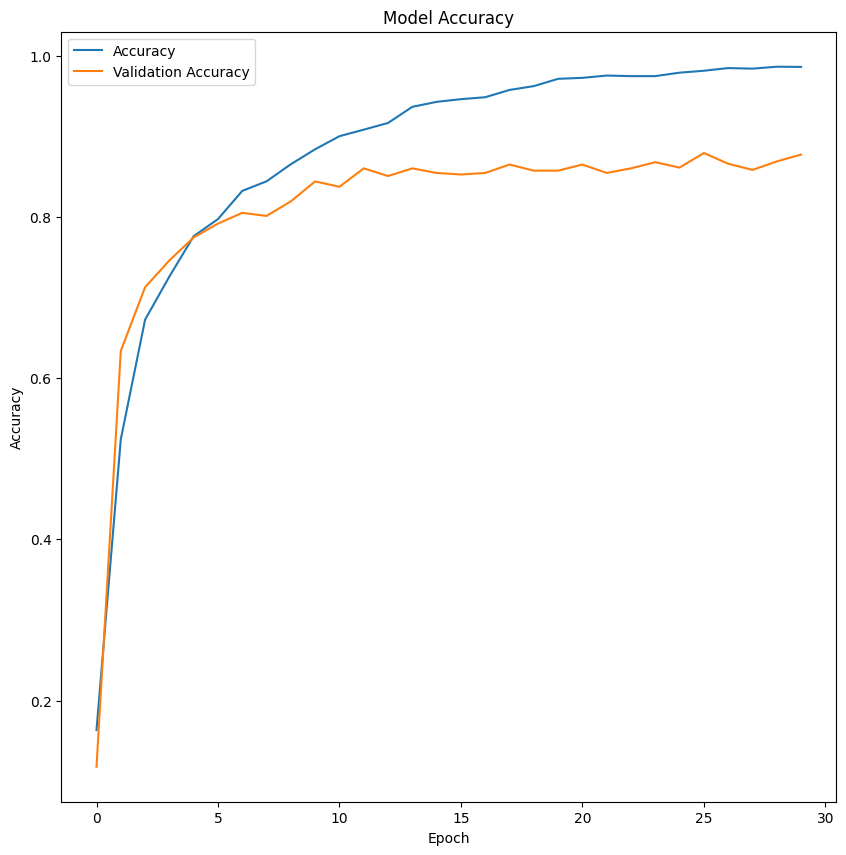

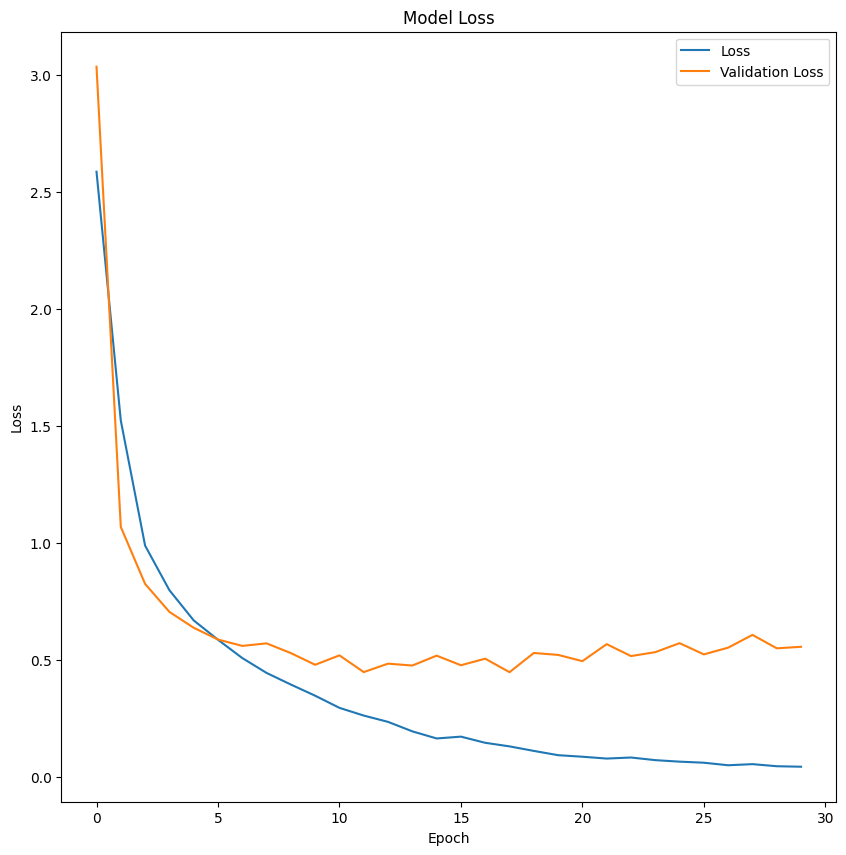

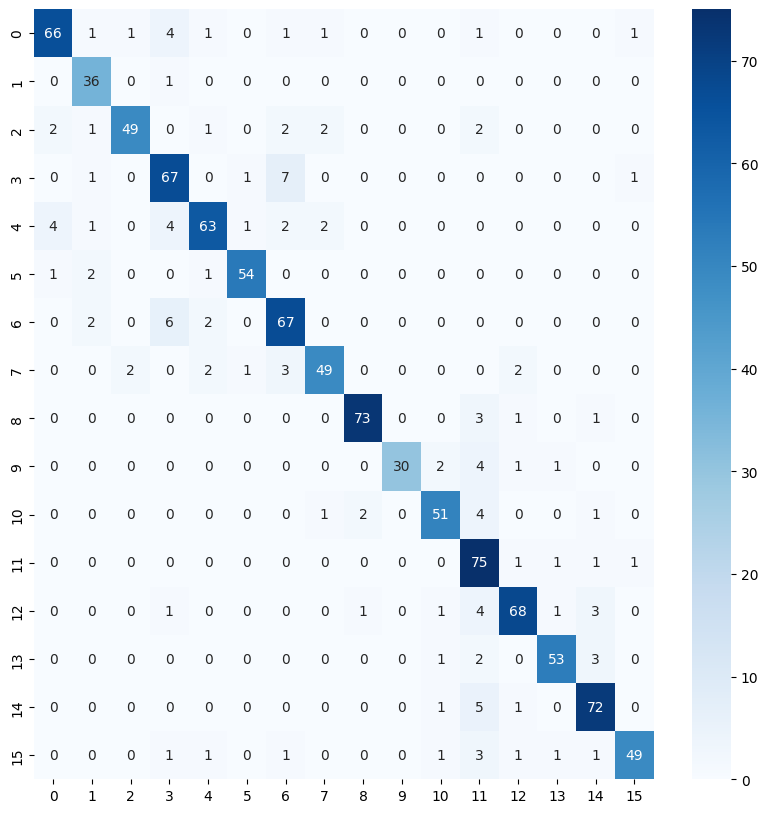

In [8]:
# Model training, prediction and metrices printing, plots, training time analysis
import time
start_time = time.time()
cnn.fit(model, optimizer, 'categorical_crossentropy', "CNN with Feature Array.h5")
print("Time %s" % (time.time() - start_time))

In [11]:
model.save('audio_model.keras')